In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [46]:
X_train[0].shape

(28, 28)

#LeNet Architecture

In [63]:
model=Sequential()

# 1>
model.add(Conv2D(6, kernel_size=(5,5), activation='tanh', padding='valid', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 2>
model.add(Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

# 3>
model.add(Dense(120, activation='tanh'))

# 4>
model.add(Dense(84, activation='tanh'))

#o/p layer-
# 5>
model.add(Dense(10, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_10 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_11 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [62]:
X_train[0].shape #28x28, koi ni, lets try on this only

(28, 28)

In [ ]:
model=Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='tanh', padding='valid', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

In [50]:
history=model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1750 - accuracy: 0.9476 - val_loss: 0.0782 - val_accuracy: 0.9772
Epoch 2/25
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0744 - accuracy: 0.9763 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 3/25
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 4/25
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0426 - accuracy: 0.9862 - val_loss: 0.0594 - val_accuracy: 0.9822
Epoch 5/25
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 6/25
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 7/25
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0499 -

In [51]:
y_prob=model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [52]:
y_pred=y_prob.argmax(axis=1)

In [53]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, y_pred)


0.9874

In [56]:
import matplotlib.pyplot as plt


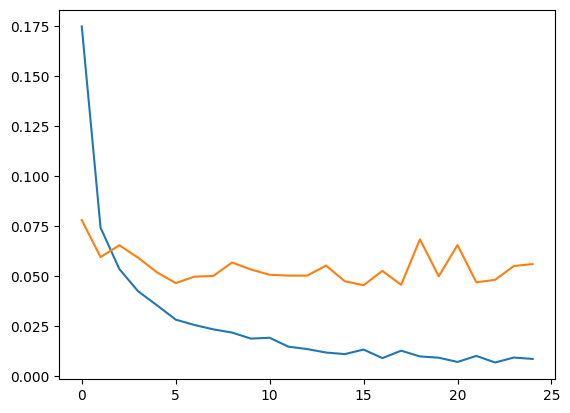

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

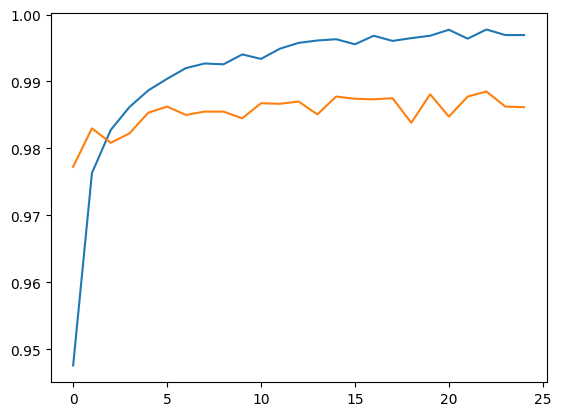

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

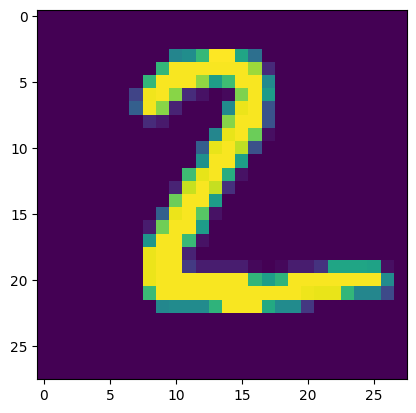

In [59]:
plt.imshow(X_test[1])


In [60]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 24ms/step


array([[5.7956124e-09, 3.9607237e-09, 5.9474634e-09, 1.1997130e-07,
        1.0907650e-10, 1.4931920e-11, 1.6159063e-14, 9.9999893e-01,
        2.0660715e-09, 8.9902392e-07]], dtype=float32)

In [61]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)


1/1 [==============================] - 0s 22ms/step


array([7])